In [217]:
from __future__ import division
import numpy
import pandas
import matplotlib.pyplot as plt
from numpy import matrix, linalg, linspace, interp, asarray, argmax
from scipy.integrate import odeint
from scipy.stats import linregress 
%matplotlib inline
#%matplotlib notebook

<img src="propionibacterium.PNG" width="650"/>

<img src="givenproperties.png" width="650" />

In [218]:
alpha = 0.125
gamma = 1.8
mumax = 0.22
thetamax = 0.09
MMx = 24.6 #g/mol

1) Determine the value of $\beta$. [2]

In [219]:
DOR = numpy.matrix([[-1, 0, 1, 1, 0],
                   [-4, 0, 4.2, 0, 2],
                   [0, -1, 0.2, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 0, 1, 0]])

C = numpy.matrix([0, 0, 0, 1, alpha]).T

DORrates = numpy.linalg.solve(DOR,C)

Beta = DORrates[4,0]

Beta

0.1499999999999999

2.)Determine the value of y by calculating the degree of reduction of pyruvic acid and propionic acid. [3]

Pyr($CH_{4/3}O$) Dor = 4 + 4/3 - 2 = 10/3

PrA($CH_2O_{2/3}$)Dor = 4 + 2 - 4/3 = 14/3 

The difference in DOR is 4/3

Each 2/3rds hydrogen represents 1/3rd NADH, therefore the increase required is 2/3NADH


In [220]:
y = 2/3
y

0.6666666666666666

3.) Note that 4 equations of the flux model were supplied in hidden format (2017 ST2_model.xlsx) where
the fourth row represents the ATP balance (that is equal to $\theta$). This question checks if your own energy balance is correct. Replace row 4 with your own ATP balance and change $\gamma$ to 2.1 mol ATP/(cmol X). All other parameters remain the same while $\mu$ and $\theta$ are at the maximum values.
Note that $\gamma$ will be taken as 1.8 mol ATP/(cmol X) for all other questions, so make sure to
change it back to the original value after you are done with this question. What is the rate of
propionic acid production in cmol/(cmol X.h)? [3]

In [221]:
def response_Q3(C):
    Cx, Cs, Cpyr, Caca, Cpra = C[0], C[1], C[2], C[3], C[4]
    
    S = numpy.matrix(pandas.read_excel('2017 ST2_model1.xlsx'))
    S1 = numpy.vstack([S,[0,1,0,0,0]])
    K = numpy.matrix([0,0,0, thetamax, mumax]).T
    r = numpy.linalg.solve(S1,K)
    
    return [r[1,0],      #X
            -r[0,0],     #Glucose
            r[2,0],      #Pyruvate
            r[3,0],      #Acetic Acid
            r[4,0]]      #Propionic Acid

In [222]:
Cxo = 0
Cso = 1
Co = [Cxo, Cso, 0, 0, 0]

rates_Q3 = response_Q3(Co)

rx = rates_Q3[0]
rs = -rates_Q3[1]
rpyr = rates_Q3[2]
raca = rates_Q3[3]
rpra = rates_Q3[4]

print('Rate of propionic acid production= ', rpra, 'cmol/(cmol X.h)')

Rate of propionic acid production=  0.8774999999999982 cmol/(cmol X.h)


4.) What is the ratio of propionic acid to acetic acid produced (in cmol/cmol) when only growth (and no maintenance) is considered? [2]

In [223]:
def response_Q4(C):
    Cx, Cs, Cpyr, Caca, Cpra = C[0], C[1], C[2], C[3], C[4]
    
    S = numpy.matrix(pandas.read_excel('2017 ST2_model2.xlsx'))
    S1 = numpy.vstack([S,[0,1,0,0,0]])
    K = numpy.matrix([0,0,0, 0, mumax]).T
    r = numpy.linalg.solve(S1,K)
    
    return [r[1,0],      #X
            -r[0,0],     #Glucose
            r[2,0],      #Pyruvate
            r[3,0],      #Acetic Acid
            r[4,0]]      #Propionic Acid

In [224]:
Cxo = 0
Cso = 1
Co = [Cxo, Cso, 0, 0, 0]

rates_Q4 = response_Q4(Co)

rx4 = rates_Q4[0]
rs4 = -rates_Q4[1]
rpyr4 = rates_Q4[2]
raca4 = rates_Q4[3]
rpra4 = rates_Q4[4]

print('Yaca_pra =', rpra4/raca4, 'cmolPrA/cmolAcA')

Yaca_pra = 3.5454545454545365 cmolPrA/cmolAcA


5.) What is the ratio of propionic acid to acetic acid produced (in cmol/cmol) when only maintenance(and no growth) is considered? [1]

In [225]:
def response_Q5(C):
    Cx, Cs, Cpyr, Caca, Cpra = C[0], C[1], C[2], C[3], C[4]
    
    S = numpy.matrix(pandas.read_excel('2017 ST2_model2.xlsx'))
    S1 = numpy.vstack([S,[0,1,0,0,0]])
    K = numpy.matrix([0,0,0, thetamax, 0]).T
    r = numpy.linalg.solve(S1,K)
    
    return [r[1,0],      #X
            -r[0,0],     #Glucose
            r[2,0],      #Pyruvate
            r[3,0],      #Acetic Acid
            r[4,0]]      #Propionic Acid

In [226]:
Cxo = 0
Cso = 1
Co = [Cxo, Cso, 0, 0, 0]

rates_Q5 = response_Q5(Co)

rx5 = rates_Q5[0]
rs5 = -rates_Q5[1]
rpyr5 = rates_Q5[2]
raca5 = rates_Q5[3]
rpra5 = rates_Q5[4]

print('Yaca_pra =', rpra5/raca5, 'cmolPrA/cmolAcA')

Yaca_pra = 2.9999999999999933 cmolPrA/cmolAcA


6.) Explain the difference between questions 4.) and 5.). [4]

When there is growth only, it implies in this case that the process is anaerobic only.


When there is maintenance only, it implies not enough ATP is made available for growth


7.) What is the expenditure rate on growth when the total glucose consumption rate is 1$cmolS/(cmolX.h)$. Give the answer in $(cmolS/(cmolX.h))$. [4]

In [227]:
print('Glucose exp on growth only=',rs4) #from Q4
print('Glucose exp on maintenance only=',rs5) #from Q5

Growth_exp = 1-rs5
print('The Growth Expenditure rate = ', Growth_exp,'cmolS/(cmolX.h)')


Glucose exp on growth only= 1.1632499999999986
Glucose exp on maintenance only= 0.20249999999999976
The Growth Expenditure rate =  0.7975000000000002 cmolS/(cmolX.h)


In [228]:
#Part 7a
# to find mu, redo matrix with the specification equation making glucose 1cmolS/cmolx.h

def response_Q7(C):
    Cx, Cs, Cpyr, Caca, Cpra = C[0], C[1], C[2], C[3], C[4]
    
    S = numpy.matrix(pandas.read_excel('2017 ST2_model2.xlsx'))
    S1 = numpy.vstack([S,[1,0,0,0,0]])
    K = numpy.matrix([0,0,0, thetamax, 1]).T #specified glucose as 1cmolS/cmolx.h
    r = numpy.linalg.solve(S1,K)
    
    return [r[1,0],      #X
            -r[0,0],     #Glucose
            r[2,0],      #Pyruvate
            r[3,0],      #Acetic Acid
            r[4,0]]      #Propionic Acid
rates7 = response_Q7(Co)

print(rates7)

mu7 = numpy.round(rates7[0],3)
print('For 1cmolS mu= ', mu7, '1/h')

[0.15082742316784872, -1.0, 0.8303191489361703, 0.16943262411347526, 0.5761702127659574]
For 1cmolS mu=  0.151 1/h


In [229]:
#Part 7b
#from part 7a, we now know that for 1cmolS/cmolX.h, part of that 1cmolS will be used for growth that results in mu=0.15
#If we now fix mu from 7a in the specification equation, we will be able to see how much of the 1cmolS was spent on this growth
#Also make theta=0, then we will know how much glucose goes towards growth only

def response_Q7b(C):
    Cx, Cs, Cpyr, Caca, Cpra = C[0], C[1], C[2], C[3], C[4]
    
    S = numpy.matrix(pandas.read_excel('2017 ST2_model2.xlsx'))
    S1 = numpy.vstack([S,[0,1,0,0,0]])
    K = numpy.matrix([0,0,0, 0, mu7]).T #specified mu7
    r = numpy.linalg.solve(S1,K)
    
    return [r[1,0],      #X
            -r[0,0],     #Glucose
            r[2,0],      #Pyruvate
            r[3,0],      #Acetic Acid
            r[4,0]]      #Propionic Acid
rates7b = response_Q7b(Co)

print(rates7b)

Gluc_Growth = numpy.round(-rates7b[1],3)

print('Glucose expended on Growth=', Gluc_Growth, 'cmolS/cmolX.h')

[0.151, -0.7984124999999992, 0.6285374999999999, 0.12457500000000014, 0.4416749999999993]
Glucose expended on Growth= 0.798 cmolS/cmolX.h


A batch fermenter run is performed . The initial glucose concentration is 150 g/L while the initial biomass concentration is 0.001 cmolX/L. The Monod constants for both growth and maintenance is given by 0.0002 cmol/L. The growth is inhibited by propionic acid ($ \C_p$) according to the following relationship:
$$ \mu = \mu_{max}(1 - C_p^2)$$


8.) At what time in the fermentation does growth stop? Your answer needs to be within 2% of the correct answer. Give answer in hour. [3]

In [230]:
Cs_o = 150/30 #cmolS/L
Cx_o = 0.001 #CmolX/L
Km = 0.0002 #cmol/L


In [231]:
def response_fun(C):
    
    Cx, Cs, Cpyr, Caca, Cpra = C[0], C[1], C[2], C[3], C[4]        
    Cp = Cpra
    mu1 = mumax*(1 - 0.25*(Cp**2))
    theta = thetamax*(Cs/(Km + Cs))
    
    if mu1 < 0.0001:
        mu=0
    else:
        mu=mu1
    
    S =  numpy.matrix(pandas.read_excel('2017 ST2_model2.xlsx'))
    S1 = numpy.vstack([S,[0,1,0,0,0]])  
      
    C= numpy.matrix([[0,0,0,theta, mu]]).T
    r = numpy.linalg.solve(S1,C)            
    
     
    
        
    return [r[1,0],      #X
            -r[0,0],     #Glucose
            r[2,0],      #Pyruvate
            r[3,0],      #Acetic Acid
            r[4,0],      #Propionic Acid
            theta]

In [232]:
def ferm_eq(C,t):
        Cx, Cs, Cpyr, Caca, Cpra = C[0], C[1], C[2], C[3], C[4]
        
        r = response_fun([Cx, Cs, Cpyr, Caca, Cpra])
        
        rx, rs, rpyr, raca, rpra = r[0], r[1], r[2], r[3], r[4]
        
        return [rx*Cx,
                rs*Cx,
                rpyr*Cx,
                raca*Cx,
                rpra*Cx]

In [233]:
tspan = linspace(0,100,1000)
Co = [Cx_o, Cs_o, 0, 0, 0]

Ci = odeint(ferm_eq, Co, tspan)

Cx = Ci[:,0]
Cs = Ci[:,1]
Cpyr = Ci[:,2]
Caca = Ci[:,3]
Cpra = Ci[:,4]

In [234]:
r = asarray([response_fun(C) for C in Ci])

rx8 = r[:,0]
rs8 = -r[:,1]
rpyr8 = r[:,2]
raca8 = r[:,3]
rpra8 = r[:,4]

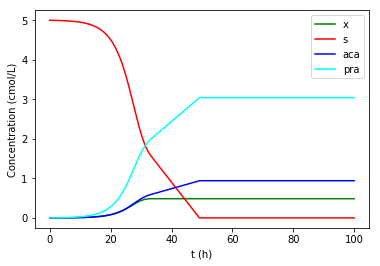

In [235]:
plt.figure(1)
plt.plot(tspan, Cx, color = 'green', label = 'x')
plt.plot(tspan, Cs, color = 'red', label = 's')
plt.plot(tspan, Caca, color = 'blue', label = 'aca')
plt.plot(tspan, Cpra, color = 'cyan', label = 'pra')
plt.xlabel('t (h)')
plt.ylabel('Concentration (cmol/L)')
plt.legend(loc='best')
#plt.grid()
plt.show()

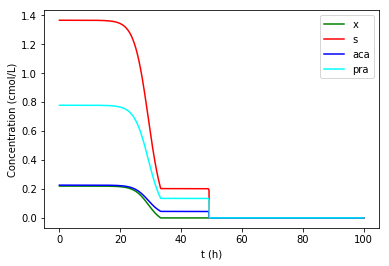

In [236]:
plt.figure(2)
plt.plot(tspan, rx8, color = 'green', label = 'x')
plt.plot(tspan, rs8, color = 'red', label = 's')
plt.plot(tspan, raca8, color = 'blue', label = 'aca')
plt.plot(tspan, rpra8, color = 'cyan', label = 'pra')
plt.xlabel('t (h)')
plt.ylabel('Concentration (cmol/L)')
plt.legend(loc='best')
#plt.grid()
plt.show()

In [237]:
#if 0 is entered as desired end point, result is 100 hours
#make sure to draw graph to see if result is reasonable
#in this case, growth stops near 30 on graph so results are reasonable

growthend = interp(0.000000000001,rx8[::-1],tspan[::-1]) 
print(growthend,'h')

33.3333333331982 h


9.) Determine the time elapsed when the maximum volumetric growth rate occurs. Your Answer needs to be within 1% of the correct result. Give the answer in hours. [3]

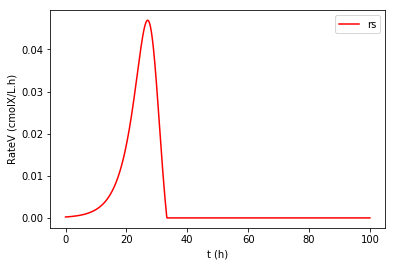

In [250]:
r9 = asarray([response_fun(C) for C in Ci])

rx9 = r9[:,0]
rs9 = r9[:,1]
rpyr9 = r9[:,2]
raca9 = r9[:,3]
rpra9 = r9[:,4]
theta = r9[:,5]

rx9_v = rx9*Cx

plt.figure(3)
#plt.plot(tspan, rx9, color = 'green', label = 'rx')
#plt.plot(tspan, rs9, color = 'blue', label = 'rs')
plt.plot(tspan, rx9_v, color = 'red', label = 'rs')
plt.xlabel('t (h)')
plt.ylabel('RateV (cmolX/L.h)')
plt.legend(loc='best')
#plt.grid()
plt.show()

In [251]:
rx9_v = rx9*Cx
rx9_vmax = argmax(rx9_v == max(rx9_v))
tmax = tspan[rx9_vmax]
tmax

27.027027027027028

10.) Plot the instantaneous and accumulative yield of propionic acid on glucose (in cmol/cmol) on a single quantitative plot. Accumulative is the overall product yield obtained at the specific instant in time (as if the fermentation stopped at that instant in time). [4]

C:\Users\baral\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


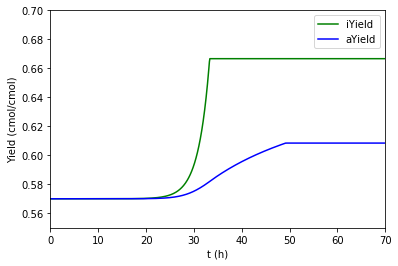

In [240]:
iYield = rpra9/-rs9
aYield = Cpra /-(Cs - Cs_o)
#plt.plot(tspan, -ri[:,1])
#plt.plot(tspan, ri[:,2])
plt.figure(4)
plt.plot(tspan, iYield, color='green', label='iYield')
plt.plot(tspan, aYield, color='blue', label='aYield')
plt.axis([0,70,0.55, 0.7])
plt.xlabel('t (h)')
plt.ylabel('Yield (cmol/cmol)')
plt.legend(loc='best')
plt.show()


11.) Determine the time in the fermentation when the energy expenditure is perfectly balanced between growth and maintenance (1:1). Your answer needs to be within 1% of the correct solution. [4]

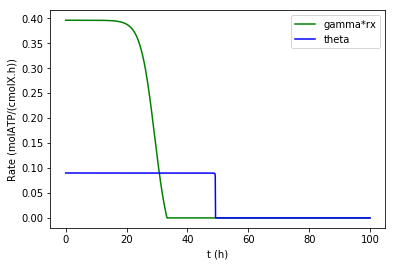

In [241]:
# In the ATP balance line of the matrix, theta is the maintenance, and -gamma*r1 is the growth. Both are equal in a perfectly balanced energy expenditure


plt.figure(5)
plt.plot(tspan, rx9*1.8, color = 'green', label = 'gamma*rx')
plt.plot(tspan, theta, color = 'blue', label = 'theta')
plt.xlabel('t (h)')
plt.ylabel('Rate (molATP/(cmolX.h))')
plt.legend(loc='best')
#plt.grid()
plt.show()

In [242]:
tspan[numpy.where(abs(rx9*1.8)<theta)[0][0] ] #result looks reasonable

30.830830830830834

12.) If the value of $\theta_{max}$ was two times higher, how will the overall product yield (APY) and productivity compare to before (when all glucose is consumed)

In [243]:
tend = tspan[ numpy.where(Cs <= 0)[0][0] ]
tend

49.24924924924925

In [244]:
growthend

33.3333333331982

In [245]:
print("APY", aYield[-1])
print("Productivity", Cpra[-1]/tend)

def response_fun2(C):
    
    Cx, Cs, Cpyr, Caca, Cpra = C[0], C[1], C[2], C[3], C[4]        
    Cp = Cpra        
    mu1=mumax*Cs/(Km+Cs)*(1-0.25*Cp*Cp)
    theta=2*thetamax*Cs/(Km+Cs)
    
    if mu1 < 0.0001:
        mu=0
    else:
        mu=mu1
    
    S =  numpy.matrix(pandas.read_excel('2017 ST2_model2.xlsx'))
    S1 = numpy.vstack([S,[0,1,0,0,0]])  
      
    C= numpy.matrix([[0,0,0,theta, mu]]).T
    r = numpy.linalg.solve(S1,C)            
    
     
    
        
    return [r[1,0],      #X
            -r[0,0],     #Glucose
            r[2,0],      #Pyruvate
            r[3,0],      #Acetic Acid
            r[4,0],      #Propionic Acid
            theta,
            mu]                                                    


APY 0.6084448984040678
Productivity 0.06177199730748615


In [246]:
def ferm_eq2(C,t):
    Cx, Cs, Cpyr, Caca, Cpra = C[0], C[1], C[2], C[3], C[4]
    r = response_fun2([Cx, Cs, Cpyr, Caca, Cpra])
    rx, rs, rpyr, raca, rpra = r[0], r[1], r[2], r[3], r[4]
    
          
    return [rx*Cx,
            rs*Cx,
            rpyr*Cx,
            raca*Cx,
            rpra*Cx]

APY2 0.6198329871878518
Productivity2 0.07389178451081908


C:\Users\baral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


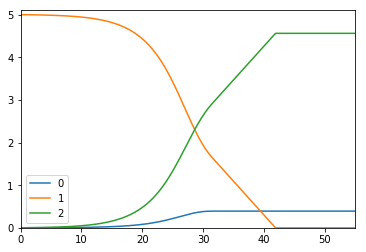

In [247]:
Ci2 = odeint(ferm_eq2, Co, tspan)

aYield2 = Ci2[:,4] / -( Ci2[:,1] - Ci2[:,1][0])
tend2 = tspan[ numpy.where(Ci2[:,1] <= 0)[0][0] ]
print("APY2", aYield2[-1])
print("Productivity2", Ci2[:,4][-1]/tend2)

for i in range(3):
    plt.plot(tspan, Ci2[:,i], label=i)
plt.legend()
plt.axis([0,55,0,5.1])
plt.show()

C) Yield and productivity will increase because glucose consumption rates will be higher at all times and instantaneous yields higher during growth.